# Exercici 1

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('C:\\Users\\Marc\\anaconda3\\Data-Science-main\\Data-sources\\tips.csv', sep='\t', encoding='utf-8')

tips = tips.replace([np.inf, -np.inf], np.nan)
tips.dropna(inplace=True)

tips[:5]


,"total_bill,""tip"",""sex"",""smoker"",""day"",""time"",""size"""
0,"16.99,1.01,""Female"",""No"",""Sun"",""Dinner"",2"
1,"10.34,1.66,""Male"",""No"",""Sun"",""Dinner"",3"
2,"21.01,3.5,""Male"",""No"",""Sun"",""Dinner"",3"
3,"23.68,3.31,""Male"",""No"",""Sun"",""Dinner"",2"
4,"24.59,3.61,""Female"",""No"",""Sun"",""Dinner"",4"


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


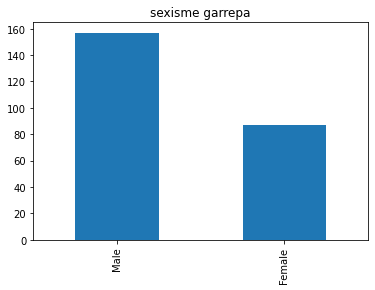

In [45]:
#sns.barplot(x='total_bill', y='day', data=tips, orient="h")
import seaborn as sns
tips = sns.load_dataset('tips')
fig1=tips['sex'].value_counts().plot(kind="bar",title = 'sexisme garrepa')
tips.head()

In [18]:
fig1.get_figure().savefig('fig1_2.png')

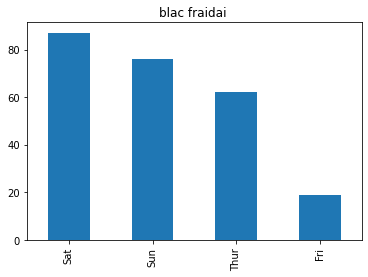

In [20]:
fig2=tips['day'].value_counts().plot(kind="bar",title = 'blac fraidai ')

In [21]:
fig2.get_figure().savefig('fig2_2.png')

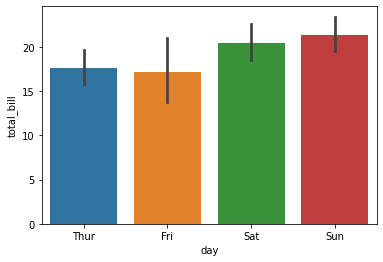

In [24]:
fig3=sns.barplot(y="total_bill", x="day", data=tips)

In [25]:
fig3.get_figure().savefig('fig3_2.png')

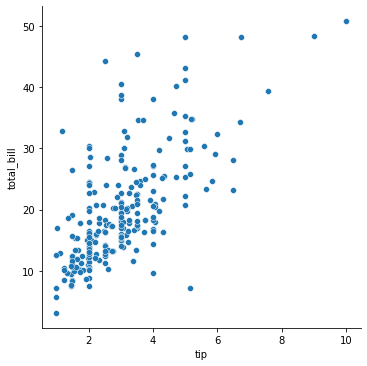

In [26]:
fig4=sns.relplot(y="total_bill", x="tip", data=tips)

In [28]:
fig4.savefig('fig4_2.png')

Text(0.5, 1.0, 'generositat diaria')

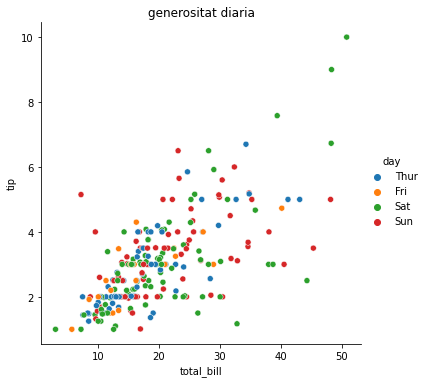

In [30]:
fig5=sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
plt.title("generositat diaria")

In [31]:
fig5.savefig('fig5_2.png')

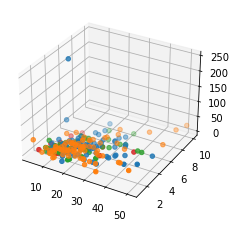

In [47]:
tips['tip_percent'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

from mpl_toolkits.mplot3d.axes3d import get_test_data

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
for x in tips.day.unique():
    fig6=ax.scatter(tips.total_bill[tips.day==x],tips.tip[tips.day==x],tips.tip_percent[tips.day==x],label=x)


In [48]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   total_bill   244 non-null    float64 
 1   tip          244 non-null    float64 
 2   sex          244 non-null    category
 3   smoker       244 non-null    category
 4   day          244 non-null    category
 5   time         244 non-null    category
 6   size         244 non-null    int64   
 7   tip_percent  244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.3 KB


# Exercici 2

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pelis = pd.read_csv('C:\\Users\\Marc\\anaconda3\\Data-Science-main\\Pre-processing-data\\movies.dat', sep='::',names = ['titol', 'genere'])
#pelis.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
#pelis.head()
#pd.get_dummies(pelis["genere"].str.get_dummies(sep='|'))
genere = pelis["genere"].str.get_dummies(sep='|')
genere.head()

<ipython-input-32-41cabf783cba>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pelis = pd.read_csv('C:\\Users\\Marc\\anaconda3\\Data-Science-main\\Pre-processing-data\\movies.dat', sep='::',names = ['titol', 'genere'])


,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
genere.columns

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [50]:
genere.value_counts()

Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western
0       0          0          0           0       0      0            1      0        0          0       0        0        0        0       0         0    0          843
                                          1       0      0            0      0        0          0       0        0        0        0       0         0    0          521
                                          0       0      0            0      0        0          1       0        0        0        0       0         0    0          178
                                          1       0      0            1      0        0          0       0        0        0        0       0         0    0          162
                                                                      0      0        0          0       0        0        1        0       0         0    0 

(array([8., 5., 3., 0., 0., 0., 0., 1., 0., 1.]),
 array([  44. ,  199.9,  355.8,  511.7,  667.6,  823.5,  979.4, 1135.3,
        1291.2, 1447.1, 1603. ]),
 <BarContainer object of 10 artists>)

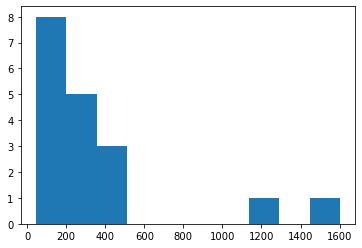

In [58]:
eee=genere.sum()
#fig1=eee.value_counts().plot(x=genere.sum(),kind="hist",title = 'ospa!')

plt.hist(eee)

In [52]:
eee.value_counts()

68      2
1603    1
211     1
471     1
114     1
283     1
343     1
503     1
276     1
251     1
1200    1
143     1
492     1
44      1
106     1
105     1
127     1
dtype: int64

In [53]:
genere.sum()

Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64